In [1]:
# import libraries
import pandas as pd
import json

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
with open("image-prediction.tsv", mode='wb') as file:
    file.write(response.content)
    df2 = pd.read_csv('image-prediction.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
df_list = []

with open ('tweet-json.txt', 'r') as tweet_data:
    for line in tweet_data:
        data = json.loads(line)
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        df_list.append({'tweet_id': tweet_id,
                        'date_created': created_at,
                        'favorite_count': favorite_count,
                        'retweet_count' : retweet_count })
        
        
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'date_created', 'favorite_count', 'retweet_count' ])
df3

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48


# Assess

###### Df1 (twitter-archive-enhanced)

In [5]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665...,13,10,Max,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
522,809808892968534016,NaN,NaN,2016-12-16 17:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maximus. His face is st...,7.939622e+17,4.196984e+09,2016-11-02 23:45:19 +0000,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
1590,686618349602762752,NaN,NaN,2016-01-11 18:39:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None,None,pupper,None
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None,None,None,None
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676606785...,12,10,None,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,None,None,pupper,None


doggo, floofer, pupper, and puppo should be in one single column.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Timestamp dtype is not suppose to be 'object'

In [8]:
df1[df1['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


Rows that have non-empty retweeted_status_id are duplicated rows from retweet.

In [9]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

some values in rating_denominator column isn't "10"

In [10]:
df1['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [12]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Nulls represented as (none) in name, doggo, floofer, pupper, and puppo column.

###### Df2  (Image-predictions)

In [15]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df2.tweet_id.value_counts()

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64

In [18]:
df2.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [19]:
df2['jpg_url'].nunique()

2009

Number of unique counts of 'jpg_url' shows 2009 as oppose to counts of 2075. This shows 66 duplicate rows.

###### Df3 (tweet-json)

In [20]:
df3.head()

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


In [21]:
df3.sample(10)

,tweet_id,date_created,favorite_count,retweet_count
1681,681694085539872773,Tue Dec 29 04:31:49 +0000 2015,14010,4581
1144,727155742655025152,Mon May 02 15:20:13 +0000 2016,3983,1490
1225,713909862279876608,Sun Mar 27 02:05:49 +0000 2016,2078,616
1005,747600769478692864,Tue Jun 28 01:21:27 +0000 2016,2545,619
1161,723673163800948736,Sat Apr 23 00:41:42 +0000 2016,3291,1011
2181,668989615043424256,Tue Nov 24 03:08:48 +0000 2015,726,356
1397,699691744225525762,Tue Feb 16 20:28:06 +0000 2016,11252,5174
790,773704687002451968,Thu Sep 08 02:09:06 +0000 2016,7317,1891
1540,689599056876867584,Wed Jan 20 00:03:21 +0000 2016,12795,6265
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   date_created    2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


Date_created dtype is in 'object' dtype

##### __QUALITY ISSUES__

###### Df1 (twitter-archive-enhanced)

1. Rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are duplicated rows.
2. In_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
    and expanded_urls columns are not necessary and needs to be dropped.
3. Timestamp needs to be datetime dtype not 'object'.    
4. some values in rating_denominator column isn't "10".      
5. Nulls represented as (none) in name, doggo, floofer, pupper, and puppo column.

###### Df2 (Image-predictions)

6. jpg_url shows duplicated counts of 66

###### Df3 (tweet-json)

7.'date_created' as it is identical to 'timestamp' on Df1.


###### Df_ combined 

10. 'tweet_id' column is a qualitative variable, but the dtype is in 'int'.
11.  Dtype for img_num, favorite_count and retweet_count has changed after merging.

##### __TIDINESS ISSUES__

###### Df1 (twitter-archive-enhanced)
8. doggo, floofer, pupper, and puppo should be in one column not 4.
9. The three dataframes should be in one dataframe


# Cleaning Data

__Make a copy of all the datasets__

In [23]:
# To copy "df"
df1_cleaned = df1.copy()
df2_cleaned = df2.copy()
df3_cleaned = df3.copy()

### Issue #1:
Rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are duplicated rows

#### Define:
Put only rows that have empty 'retweeted_status_id' column for the dataframe

#### Code

In [24]:
df1_cleaned = df1[df1["retweeted_status_id"].isnull()]

#### Test

In [25]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2: 
__In_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns are not necessary and needs to be dropped.__

#### Define:
Drop unnecessary columns from Df1_clean (twitter-archive-enhanced) using panda drop method.

#### Code

In [26]:
#Drop in_reply_to_status_id, in_reply_to_user_id, 'text', retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns.
df1_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\918635754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)


#### Test

In [27]:
# to confirm
df1_cleaned.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,None,None,None,None


### Issue #3: 
Timestamp needs to be datetime dtype not 'object'.

#### Define:
Convert 'timestamp' in df1_cleaned to 'datetime' dtype usin 'pd.to_datetime'

#### Code

In [28]:
# to Convert 'timestamp' in df1_clean to 'datetime' dtype
df1_cleaned['timestamp']=pd.to_datetime(df1_cleaned['timestamp'])

C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2173914458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['timestamp']=pd.to_datetime(df1_cleaned['timestamp'])


#### Test

In [29]:
# to confirm
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


### Issue #4:
__some values in rating_denominator column isn't "10"__

#### Define:
Make all values in 'rating_denominator' equal "10".

#### Code

In [30]:
# to make all values in 'rating_denominator' equal "10".
df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] >= 10 ] = df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] >= 10 ] = 10
df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] <= 10 ] = df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] <= 10 ] = 10

C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2956570553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] >= 10 ] = df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] >= 10 ] = 10
C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2956570553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] >= 10 ] = df1_cleaned.rating_denominator[df1_cleaned['rating_denominator'] >= 10 ] = 10
C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2956570553.py:2: SettingWithCopy

#### Test

In [31]:
# to confirm
df1_cleaned['rating_denominator'].value_counts()


10    2175
Name: rating_denominator, dtype: int64

### Issue #5:
Nulls represented as (none) in name, doggo, floofer, pupper, and puppo column.

#### Define:
Replace 'None' with 'NaN' in the name, doggo, floofer, pupper, and puppo columns using replace function.

#### Code

In [32]:
# to replace 'None' with 'NaN'
import numpy as np
df1_cleaned['name'] = df1_cleaned['name'].replace('None', np.NaN)
df1_cleaned['doggo'] = df1_cleaned['doggo'].replace('None', np.NaN)
df1_cleaned['floofer'] = df1_cleaned['floofer'].replace('None', np.NaN)
df1_cleaned['pupper'] = df1_cleaned['pupper'].replace('None', np.NaN)
df1_cleaned['puppo'] = df1_cleaned['puppo'].replace('None', np.NaN)

C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2066162770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['name'] = df1_cleaned['name'].replace('None', np.NaN)
C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2066162770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['doggo'] = df1_cleaned['doggo'].replace('None', np.NaN)
C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\2066162770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

#### Test

In [33]:
# to confirm
df1_cleaned['name'].value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 955, dtype: int64

### Issue #6:
__jpg_url shows duplicated counts of 66__

#### Define:
Drop duplicated rows in 'Df2_clean (Image-predictions) using drop function.

#### Code

In [34]:
# to view number of duplicate rows
sum(df2_cleaned.duplicated(subset = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']))

66

In [35]:
# to extract the duplicated rows
df2_cleaned.loc[df2_cleaned.duplicated(subset = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']), :]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [36]:
# to drop the duplicated rows
df2_cleaned.drop_duplicates(subset = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace = True)

#### Test

In [37]:
# to confirm
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


### Issue #7:
__'date_created' as it is identical to 'timestamp' on Df1.__

#### Define:
Drop 'date_created' in Df3_cleaned (tweet-json) using drop function

#### Code

In [38]:
df3_cleaned.drop(['date_created'], axis=1, inplace=True)

#### Test

In [39]:
# to confirm
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #8: 
__doggo, floofer, pupper, and puppo should be in one column not 4.__

#### Define:
merge doggo, floofer, pupper, and puppo should be in one column in Df1 (twitter-archive-enhanced) using bfill function.

#### Code

In [40]:
# to merge doggo, floofer, pupper, and puppo into 'dog_stage' using bfill
df1_cleaned['dog_stage'] = df1_cleaned.bfill(axis=1)['doggo']
# to drop doggo, floofer, pupper, and puppo column
df1_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\3533521797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['dog_stage'] = df1_cleaned.bfill(axis=1)['doggo']
C:\Users\BLUEWALES\AppData\Local\Temp\ipykernel_17632\3533521797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


#### Test

In [41]:
# to confirm
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.9+ KB


### Issue #9:
__The three dataframes should be in one dataframe__

#### Define:
Combine the three dataframes in one dataframe using merge funtion.

#### Code

In [42]:
# to combine df1_cleaned, df2_cleaned and df_cleaned
df_combined = df1_cleaned.merge(df2_cleaned,how ='left').merge(df3_cleaned,how ='left')

#### Test

In [43]:
# to confirm
df_combined.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [44]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   dog_stage           344 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   float64            
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   object             
 12  p2                  1994 non-null 

### Issue #10:
'tweet_id' column is a qualitative variable, but the dtype is in 'int'.

#### Define:
 Convert 'tweet_id' column to 'object' dtype using astype(str) function

#### Code

In [45]:
df_combined['tweet_id']= df_combined['tweet_id'].astype(str)

#### Test

In [46]:
df_combined['tweet_id'].dtypes

dtype('O')

### Issue 11:
The following columns dtype has changed uppon merging.

1.img_num

2.favorite_count

3.retweet_count

#### Define:
    Converted to 'int' dtype using astype function.
    1.img_num
    2.favorite_count
    3.retweet_count

#### Code

In [47]:
df_combined.img_num = df_combined.img_num.round().astype('Int64')

In [48]:
df_combined.img_num = df_combined.favorite_count.round().astype('Int64')

In [49]:
df_combined.img_num = df_combined.retweet_count.round().astype('Int64')

#### Test

In [50]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   dog_stage           344 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             2175 non-null   Int64              
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   object             
 12  p2                  1994 non-null 

__Storing data__

In [51]:
df_combined.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [52]:
# import libraries
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>,
        <AxesSubplot:title={'center':'rating_denominator'}>],
       [<AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'p1_conf'}>,
        <AxesSubplot:title={'center':'p2_conf'}>],
       [<AxesSubplot:title={'center':'p3_conf'}>,
        <AxesSubplot:title={'center':'favorite_count'}>,
        <AxesSubplot:title={'center':'retweet_count'}>]], dtype=object)

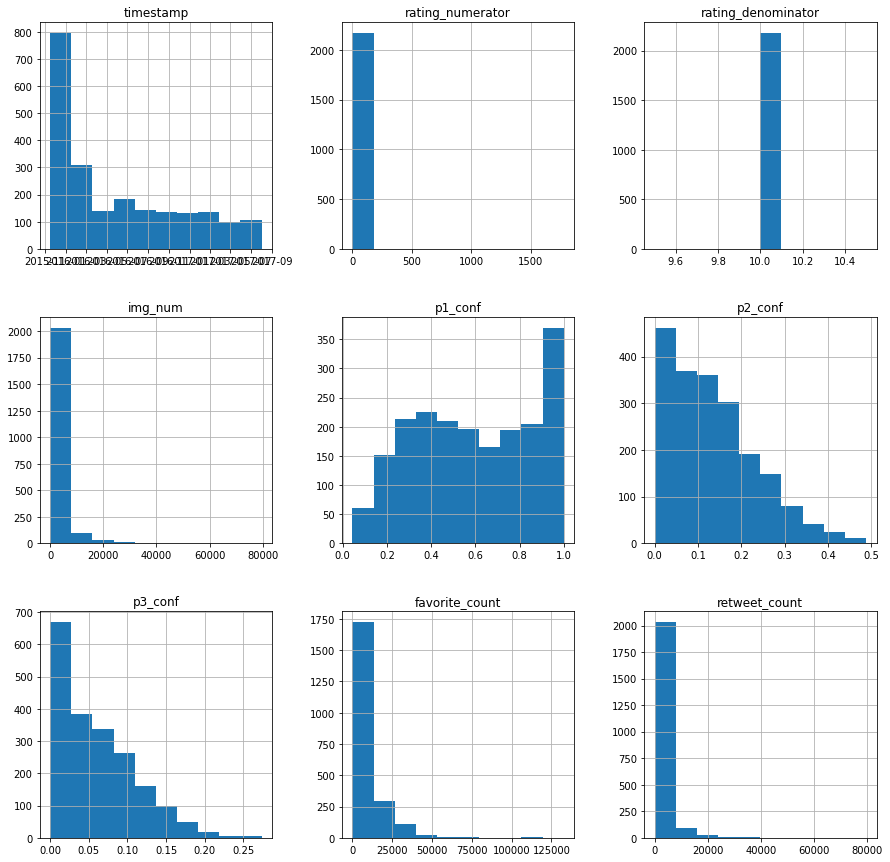

In [53]:
df_combined.hist(figsize = (15, 15))

In [54]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   dog_stage           344 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             2175 non-null   Int64              
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   object             
 12  p2                  1994 non-null 

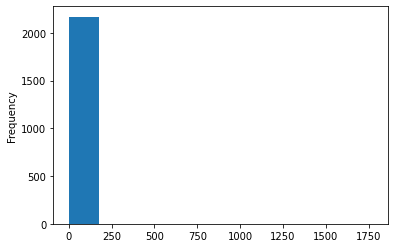

In [55]:
df_combined['rating_numerator'].plot(kind='hist');

In [56]:
round(df_combined.rating_numerator.value_counts()/len(df_combined)*100)

12      23.0
10      20.0
11      20.0
13      14.0
9        7.0
8        5.0
7        2.0
14       2.0
5        2.0
6        1.0
3        1.0
4        1.0
2        0.0
1        0.0
420      0.0
0        0.0
17       0.0
45       0.0
60       0.0
143      0.0
44       0.0
99       0.0
121      0.0
20       0.0
26       0.0
144      0.0
80       0.0
165      0.0
50       0.0
204      0.0
1776     0.0
27       0.0
75       0.0
24       0.0
84       0.0
960      0.0
15       0.0
182      0.0
666      0.0
88       0.0
Name: rating_numerator, dtype: float64

The above plot further shows that 23 percent of rating_numerator is 12, 20 percent are 10, 20 percent are 11, 14 percent are 13 and the remaining 23 percent were shared among the rest.

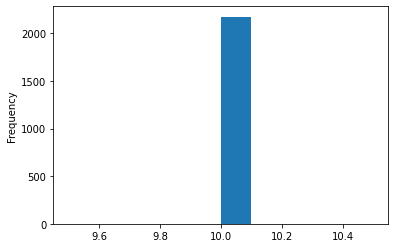

In [57]:
df_combined['rating_denominator'].plot(kind='hist');

In [58]:
round(df_combined.rating_denominator.value_counts()/len(df_combined)*100)

10    100.0
Name: rating_denominator, dtype: float64

This shows that all the rating denominators are '10' after cleanning

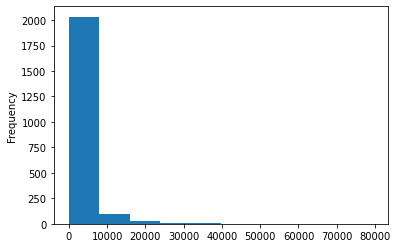

In [59]:
df_combined['img_num'].plot(kind='hist');

In [60]:
round(df_combined.img_num.value_counts()/len(df_combined)*100)

577      0.0
819      0.0
83       0.0
748      0.0
542      0.0
        ... 
3303     0.0
1656     0.0
17465    0.0
4535     0.0
147      0.0
Name: img_num, Length: 1713, dtype: Float64

The analysis shows that 79 percent provided 1 image for prediction, 9 percent provided 2 images, 3 percent provided 3 images, while only 1 percent provided 4 images for prediction.

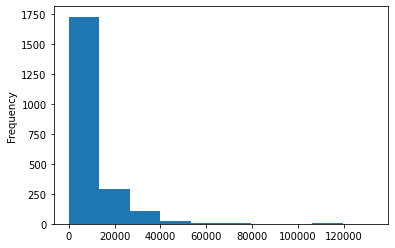

In [61]:
df_combined['favorite_count'].plot(kind='hist');

In [62]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   dog_stage           344 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             2175 non-null   Int64              
 9   p1                  1994 non-null   object             
 10  p1_conf             1994 non-null   float64            
 11  p1_dog              1994 non-null   object             
 12  p2                  1994 non-null 

### Insights:
1. Dog rating numerators are between 10 to 15.

2. Most provide just 1 image for prediction.

3. Dog ratings denorminator is 10.

<BarContainer object of 4 artists>

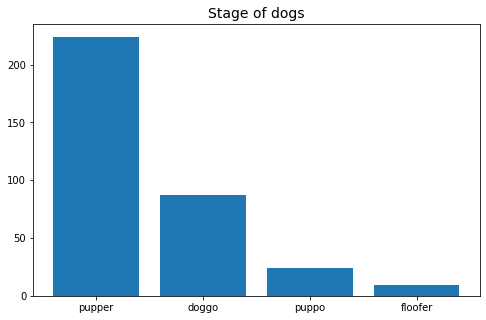

In [63]:
plt.figure(figsize=(8,5))
plt.title("Stage of dogs", fontsize=14)
plt.bar(x=df_combined['dog_stage'].value_counts().index,
        height=df_combined.dog_stage.value_counts().values)

The chart above shows that 'pupper' dog_stage is the most common at weratedogs twitter archive.